In [9]:
# importing required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Loading the data
data = pd.read_csv("data.csv")
data.head()

,No.,phi,Ha,Ra,Nu
0,1,0.01,0,1000,6.180
1,2,0.01,0,10000,6.412
2,3,0.01,0,100000,8.348
3,4,0.01,0,1000000,11.716
4,5,0.01,20,1000,6.179


In [3]:
# Features and target
X = data[['phi', 'Ha', 'Ra']].values
y = data['Nu'].values

In [4]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [7]:
# training model
model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2 :", r2_score(y_test, y_test_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE :", mean_squared_error(y_test, y_test_pred))

Train R2: 0.999247832728203
Test R2 : 0.9971388319679483
Train MSE: 0.0023611386851854575
Test MSE : 0.00913075324814839


In [25]:
# Example: phi=0.01, Ha=50, Ra=1e5
new_data = np.array([[0.01, 50, 1e5]])
new_data_scaled = scaler.transform(new_data)

predicted_Nu = model.predict(new_data_scaled)
print(f"Predicted Nu: {predicted_Nu}")

Predicted Nu: [6.81271667]


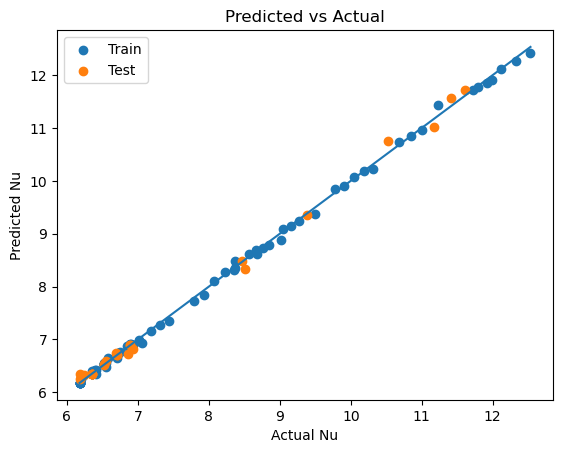

In [30]:
plt.figure()
plt.scatter(y_train, y_train_pred, label='Train')
plt.scatter(y_test, y_test_pred, label='Test')

plt.plot([y.min(), y.max()],
         [y.min(), y.max()])

plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()

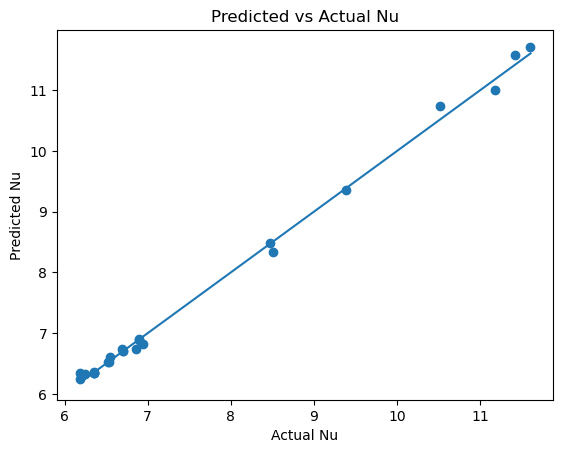

In [ ]:
# test data prediction
y_test_pred = model.predict(X_test).flatten()

plt.figure()
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs Actual Nu")
plt.show()

In [ ]:
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()
# R2 calculation
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

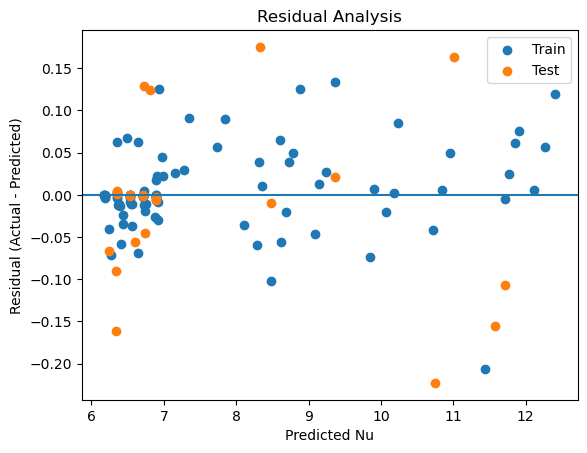

In [ ]:
# Residuals (Train vs Test)
plt.figure()
plt.scatter(y_train_pred, y_train - y_train_pred, label='Train')
plt.scatter(y_test_pred, y_test - y_test_pred, label='Test')
plt.axhline(0)
plt.xlabel("Predicted Nu")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Analysis")
plt.legend()
plt.show()

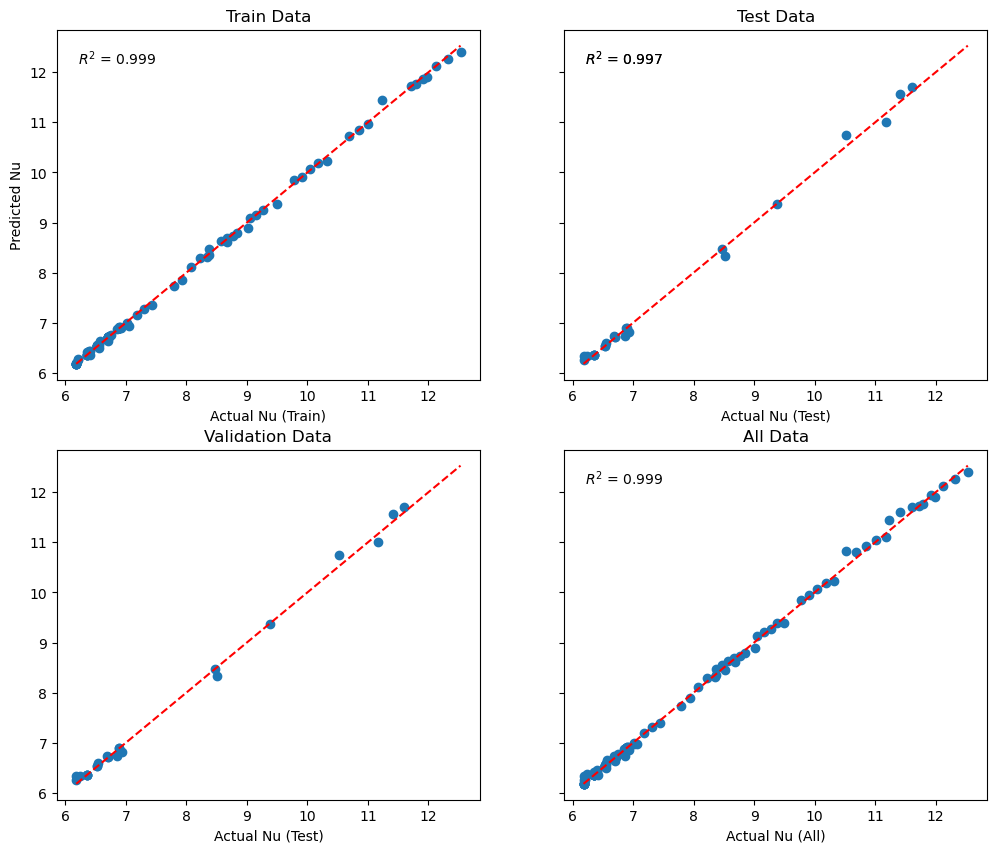

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Train
plt.sca(axes[0, 0])
plt.scatter(y_train, y_train_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Nu (Train)")
plt.ylabel("Predicted Nu")
plt.title("Train Data")
plt.text(0.05, 0.90, f"$R^2$ = {r2_train:.3f}", transform=axes[0, 0].transAxes, fontsize=10)


# Test
plt.sca(axes[0, 1])
plt.scatter(y_test, y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Nu (Test)")
plt.title("Test Data")
plt.text(0.05, 0.90, f"$R^2$ = {r2_test:.3f}", transform=axes[0, 1].transAxes, fontsize=10)

# Validation
plt.sca(axes[1, 0])
plt.scatter(y_test, y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Nu (Test)")
plt.title("Validation Data")
plt.text(0.05, 0.90, f"$R^2$ = {r2_test:.3f}", transform=axes[0, 1].transAxes, fontsize=10)


# All data
y_pred = model.predict(scaler.fit_transform(X)).flatten()
r2_all  = r2_score(y, y_pred)
plt.sca(axes[1, 1])
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Nu (All)")
plt.title("All Data")
plt.text(0.05, 0.90, f"$R^2$ = {r2_all:.3f}", transform=axes[1, 1].transAxes, fontsize=10)

#plt.tight_layout()
plt.show()


In [ ]:
Ra_vals = np.array([1e3, 1e4, 1e5, 1e6])
Ha_fixed = 20
phis = [0.01, 0.05]

In [ ]:
def avg_nu_sim(df, phi):
    return [df[(df['phi'] == phi) & (df['Ha'] == Ha_fixed) & (df['Ra'] == Ra)]['Nu'].mean()
    for Ra in Ra_vals]

In [ ]:
def avg_nu_ann(phi):
    X = np.column_stack([
        np.full(len(Ra_vals), phi),
        np.full(len(Ra_vals), Ha_fixed),
        Ra_vals
    ])
    Xs = scaler.transform(X)
    return model.predict(Xs).flatten()

In [ ]:
Nu_sim_001 = avg_nu_sim(data, 0.01)
Nu_sim_005 = avg_nu_sim(data, 0.05)

In [ ]:
Nu_ann_001 = avg_nu_ann(0.01)
Nu_ann_005 = avg_nu_ann(0.05)

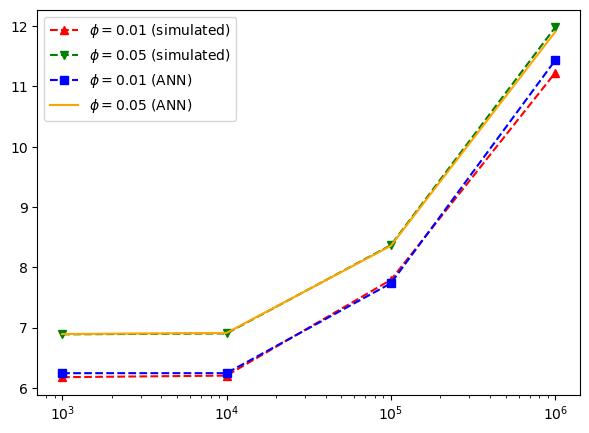

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(Ra_vals, Nu_sim_001, 'r--^', label=r'$\phi = 0.01$ (simulated)')
plt.plot(Ra_vals, Nu_sim_005, 'g--v', label=r'$\phi = 0.05$ (simulated)')
plt.plot(Ra_vals, Nu_ann_001, 'b--s', label=r'$\phi = 0.01$ (ANN)')
plt.plot(Ra_vals, Nu_ann_005, 'orange', label=r'$\phi = 0.05$ (ANN)')
plt.xscale('log')
plt.legend()